<a href="https://colab.research.google.com/github/yohanesnuwara/starting-computer-vision/blob/main/Lesson_03_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cat v. Dog Image Classification using CNN

**NOTE:** The 2,000 images used in this exercise are excerpted from the ["Dogs vs. Cats" dataset](https://www.kaggle.com/c/dogs-vs-cats/data) available on Kaggle, which contains 25,000 images. Here, we use a subset of the full dataset to decrease training time for educational purposes.

## Part 1. Load and Process Data

In [ ]:
import os
import zipfile
import glob
import cv2
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

Getting the data into Colab.

In [ ]:
# Get data
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

# Extract zip file
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# Set working directory
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

--2022-07-01 10:54:07--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   126MB/s    in 0.5s    

2022-07-01 10:54:07 (126 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


Visualize image data.

Filename: /tmp/cats_and_dogs_filtered/train/dogs/dog.140.jpg
Image size: (265, 500, 3)


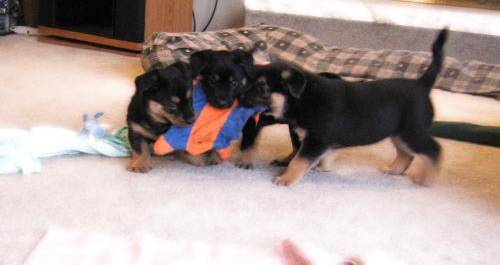

Filename: /tmp/cats_and_dogs_filtered/train/dogs/dog.228.jpg
Image size: (424, 312, 3)


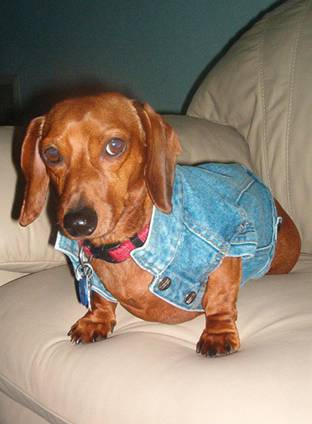

Filename: /tmp/cats_and_dogs_filtered/train/dogs/dog.386.jpg
Image size: (346, 499, 3)


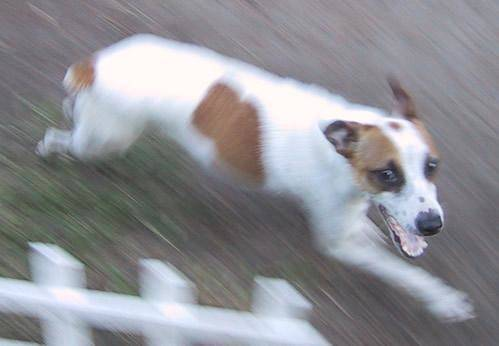

Filename: /tmp/cats_and_dogs_filtered/train/dogs/dog.91.jpg
Image size: (218, 199, 3)


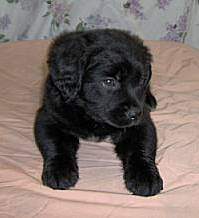

Filename: /tmp/cats_and_dogs_filtered/train/dogs/dog.281.jpg
Image size: (222, 320, 3)


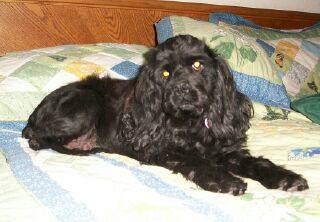

Filename: /tmp/cats_and_dogs_filtered/train/dogs/dog.1.jpg
Image size: (499, 327, 3)


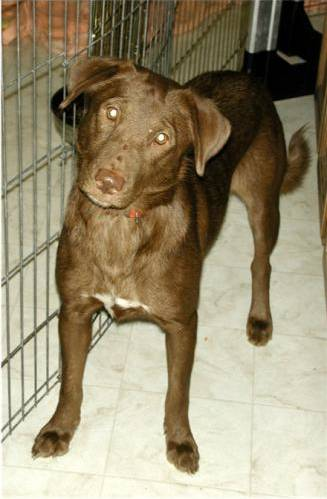

Filename: /tmp/cats_and_dogs_filtered/train/dogs/dog.457.jpg
Image size: (268, 358, 3)


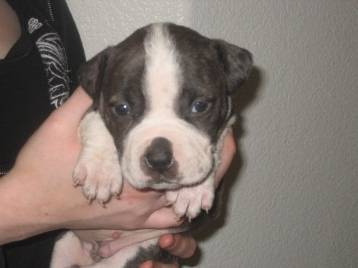

Filename: /tmp/cats_and_dogs_filtered/train/dogs/dog.148.jpg
Image size: (331, 500, 3)


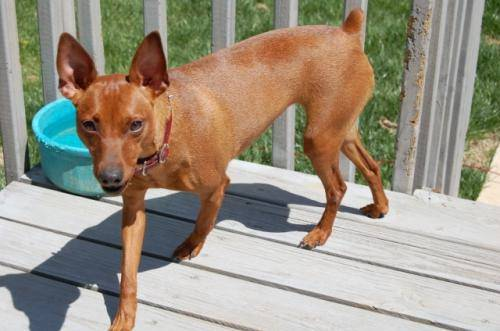

Filename: /tmp/cats_and_dogs_filtered/train/dogs/dog.23.jpg
Image size: (403, 499, 3)


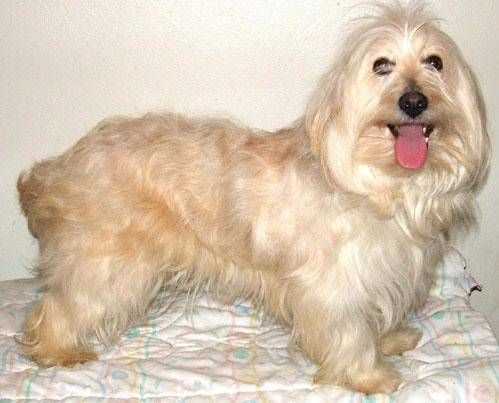

Filename: /tmp/cats_and_dogs_filtered/train/dogs/dog.895.jpg
Image size: (499, 268, 3)


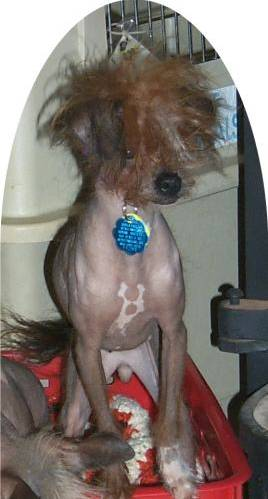

In [ ]:
# Read all filepaths
all_img_path = []
for f in glob.glob('/tmp/cats_and_dogs_filtered/train/dogs/*.jpg'):
  all_img_path.append(f)

# Visualize the first 10 dogs images
for i in range(len(all_img_path)):
  if i<10:
    img = cv2.imread(all_img_path[i])
    print('Filename:', all_img_path[i])
    print('Image size:', img.shape)
    cv2_imshow(img)

Rescale the RGB value of image by dividing with 255. Recall previous session on Intro to Neural Network. We can use Keras' built-in function to generate scaled images. 

In [ ]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

Also images have varied size. We need to change the size of image to [150,150] to fit with our neural network. We can use another Keras' built-in function. Just run the following code. 

In [ ]:
# Flow training images
train_generator = train_datagen.flow_from_directory(
        train_dir,  # source directory for training images
        target_size=(150, 150),  
        batch_size=-1, # Batch size -1 means we'll use all data instead of batches
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images
test_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=-1,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Extract X_train, y_train

In [ ]:
# Extract X_train, y_train from data generator
X_train, y_train = train_generator.next()
print(X_train.shape)
print(y_train.shape)

# Extract X_test, y_test from data generator
X_test, y_test = test_generator.next()
print(X_test.shape)
print(y_test.shape)

(1999, 150, 150, 3)
(1999,)
(999, 150, 150, 3)
(999,)


To test for labels for each sample, 0: cat, 1: dog

For more than 2 categories, how to one-hot encode them, follow link below:

https://www.youtube.com/watch?v=YmDaqXMIoeY&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=18

In [ ]:
classes= ['dog', 'cat']

In [ ]:
y_train[2]

1.0

In [ ]:
classes[int(y_train[2])]    #had to do int() since y_train[2] = 1.0 , a float, but an array can only take ints for positions

'cat'

In [ ]:
y_train_categorical = keras.utils.to_categorical(y_train, num_classes=10, dtype='float32')

## Part 2. Convolutional Neural Network

Next, train using convolutional neural network using the same logic (build, compile, fit, predict, evaluate)

```
# build model
model = Sequential()
model.add(Conv2D(...))

# compile model
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['acc'])

# train the model
model.fit(X_train, y_train, validation_split=...., epochs=...., batch_size=..., epochs=....)

# predict model
model.predict(X_test)

# evaluate model
model.evaluate(X_test, y_test)
```

In [ ]:
import matplotlib.pyplot as plt

# tensorflow
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop, SGD
from keras.callbacks import ModelCheckpoint

import pandas as pd

ImportError: ignored

In [ ]:
model= Sequential()
model.add(Conv2D(16,kernel_size=3, activation='relu',
                 input_shape=(150,150,3), padding='same'))
model.add(MaxPool2D(2))
model.add(Dropout(0.25)) #we can add mutiple dropouts in
#model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=3, activation='relu',
                  input_shape=(150,150,3), padding='same'))
model.add(MaxPool2D(2))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(2,activation='softmax'))  # tanh

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 43808)             0

We can add mutiple dropouts in the network, we can add  flatten,dropout,Flatten, dropout
We cannot add dropout then dropout again, must be inbetween something

We only need to Flatten() once, change from 2D to 1D

After we Flatten, cannot put into a Conv2D (Only accept 2D inputs)


In [ ]:
#compiling
model.compile(loss='sparse_categorical_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model_checkpoint = ModelCheckpoint('best_model', monitor='val_loss', mode='min', 

                                   save_best_only=True, verbose=1)



history = model.fit(X_train, y_train, validation_split=0.2, batch_size=32,  

                    epochs=20, callbacks=[model_checkpoint])   #smaller batch size means model learns less, can improve overfitting, should reduce batch size, but take longer computational time



NameError: ignored

In [ ]:
model.save_weights('/content/best_model.h5')

In [ ]:
model.load_weights('best_model.h5')
model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 9ms/step - loss: 1.8456 - acc: 0.6587


[1.8455841541290283, 0.6586586833000183]

In [ ]:
pd.DataFrame({'loss': history.history['loss'], 'val_loss': history.history['val_loss']})

,loss,val_loss
0,1.397484,0.688195
1,0.681219,0.681061
2,0.610244,0.663163
3,0.519148,0.634613
4,0.421329,0.689963
5,0.306207,0.788184
6,0.233147,0.811992
7,0.174995,0.828503
8,0.134856,0.887378
9,0.080813,1.054009


In [ ]:
history.history['val_loss']

[0.688194990158081,
 0.6810613870620728,
 0.663163423538208,
 0.6346133947372437,
 0.6899628639221191,
 0.7881836891174316,
 0.8119915723800659,
 0.8285028338432312,
 0.8873780965805054,
 1.0540087223052979,
 1.2683134078979492,
 1.1982297897338867,
 1.7336714267730713,
 1.4967868328094482,
 1.7777661085128784,
 1.9840179681777954,
 1.9919394254684448,
 2.071575403213501,
 1.6837295293807983,
 1.922804832458496]

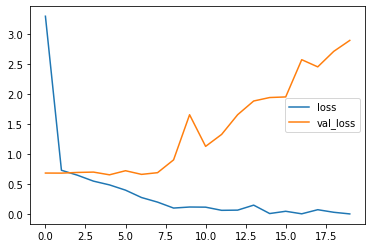

In [ ]:
def plot_model_history(history):

    fig, axes = plt.subplots(nrows=1, ncols=1)

    axes.plot(history.history['loss'])   

    axes.plot(history.history['val_loss'])

    axes.legend(['loss', 'val_loss'])



plot_model_history(history)

In [ ]:
# model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32)

Epoch 1/5
50/50 [==============================] - 13s 28ms/step - loss: 0.7296 - acc: 0.5622 - val_loss: 0.6477 - val_acc: 0.6225
Epoch 2/5
50/50 [==============================] - 1s 17ms/step - loss: 0.6299 - acc: 0.6554 - val_loss: 0.6171 - val_acc: 0.6650
Epoch 3/5
50/50 [==============================] - 1s 17ms/step - loss: 0.5753 - acc: 0.7073 - val_loss: 0.6022 - val_acc: 0.6825
Epoch 4/5
50/50 [==============================] - 1s 17ms/step - loss: 0.5273 - acc: 0.7630 - val_loss: 0.5982 - val_acc: 0.6525
Epoch 5/5
50/50 [==============================] - 1s 18ms/step - loss: 0.4953 - acc: 0.7680 - val_loss: 0.6186 - val_acc: 0.6675


In [ ]:
# predict model
model.predict(X_test)

# evaluate model
model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 9ms/step - loss: 1.8456 - acc: 0.6587


[1.8455841541290283, 0.6586586833000183]